In [1]:
from doppler_imaging import *
import numpy as np
import paths

##############################################################################
####################    Configs     ##########################################
##############################################################################

from config_run import *

savedir = "crires"
instru = "CRIRES"
band = "K"
LLD = 0.7
nlat, nlon = 20, 40
nk = 125
alpha = 5000
rvs[target] = 9e-5
incs[target] = 80

use_eqarea = True

#################### Automatic ####################################

if True:
    # Auto consistent options
    contrast = "real"
    noisetype = "real"

    cut = nk - 70

    nobs = nobss[target]

    # set chips to include
    goodchips = goodchips_run[instru][target][band]
    nchip = len(goodchips)

    # set model files to use
    if "t1" in modelspec:
        model_datafile = paths.data / f'{instru}_{target}_{band}_{modelspec}.pickle'
        pmod = f'linbroad_{modelspec}'
        rv = rvs[target]

    line_file = paths.data / f'linelists/{pmod}_edited.clineslsd'
    cont_file = paths.data / f'linelists/{pmod}C.fits'

    # set solver parameters
    period = periods[target]
    inc = incs[target]
    vsini = vsinis[target]
    veq = vsini / np.sin(inc * np.pi / 180)

    # set time and period parameters
    timestamp = timestamps[target]
    phases = timestamp * 2 * np.pi / period # 0 ~ 2*pi in rad
    theta = 360.0 * timestamp / period      # 0 ~ 360 in degree

    kwargs_sim = dict(
        ydeg=ydeg_sim,
        udeg=udeg,
        nc=nc,
        veq=veq,
        inc=inc,
        nt=nobs,
        vsini_max=vsini_max,
        u1=u1,
        theta=theta)

    kwargs_run = kwargs_sim.copy()
    kwargs_run['ydeg'] = ydeg

    kwargs_IC14 = dict(
        phases=phases, 
        inc=inc, 
        vsini=vsini, 
        LLD=LLD, 
        eqarea=use_eqarea, 
        nlat=nlat, 
        nlon=nlon,
        alpha=alpha,
        ftol=ftol
    )

    kwargs_fig = dict(
        goodchips=goodchips,
        noisetype=noisetype,
        contrast=contrast,
        savedir=savedir
    )


/Users/xqchen/workspace/igrins_doppler_imaging/.snakemake/conda/aeb890ed28d84060e5333cb74aa86281_/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using real observation /Users/xqchen/workspace/igrins_doppler_imaging/src/data/CRIRES_W1049B_K_t1500g1000f8.pickle
nobs: 14, nchip: 4, npix: 1024
mean_spectrum: (4, 1024)
template: (14, 4, 1024)
observed: (14, 4, 824)
wav: (4, 824), wav0: (4, 1024)
CRIRES
dbeta 5.04270500288737e-06
chip 0
chip 1
chip 2
chip 3
chip: 0 obs: 0 offset: 0
chip: 0 obs: 1 offset: 0
chip: 0 obs: 2 offset: 0
chip: 0 obs: 3 offset: 1
chip: 0 obs: 4 offset: 2
chip: 0 obs: 5 offset: 0
chip: 0 obs: 6 offset: 0
chip: 0 obs: 7 offset: 0
chip: 0 obs: 8 offset: 1
chip: 0 obs: 9 offset: 0
chip: 0 obs: 10 offset: 0
chip: 0 obs: 11 offset: 0
chip: 0 obs: 12 offset: 0
chip: 0 obs: 13 offset: 0
chip: 1 obs: 0 offset: 1
chip: 1 obs: 1 offset: 1
chip: 1 obs: 2 offset: 0
chip: 1 obs: 3 offset: 0
chip: 1 obs: 4 offset: -2
chip: 1 obs: 5 offset: -1
chip: 1 obs: 6 offset: -2
chip: 1 obs: 7 offset: 2
chip: 1 obs: 8 offset: -2
chip: 1 obs: 9 offset: 1
chip: 1 obs: 10 offset: 0
chip: 1 obs: 11 offset: 0
chip: 1 obs: 12 offset: 1
chi

/Users/xqchen/workspace/igrins_doppler_imaging/src/scripts/ELL_map_class.py:442: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(1. - np.tan(inc)**2 / np.tan(self.corners_latlon[0,ii])**2)


  ITER       METRIC         FACTOR             DMETRIC
      1   -32878.290010   1.50000e+00   -7.687e-01
      2   -32879.423429   2.25000e+00   -1.133e+00
      3   -32881.080514   3.37500e+00   -1.657e+00
      4   -32883.472509   5.06250e+00   -2.392e+00
      5   -32886.860218   7.59375e+00   -3.388e+00
      6   -32891.524063   1.13906e+01   -4.664e+00
      7   -32897.680989   1.70859e+01   -6.157e+00
      8   -32905.324730   2.56289e+01   -7.644e+00
      9   -32914.015692   3.84434e+01   -8.691e+00
     10   -32922.787278   5.76650e+01   -8.772e+00
     11   -32930.486267   8.64976e+01   -7.699e+00
     12   -32936.582613   1.29746e+02   -6.096e+00
     13   -32941.507451   1.94620e+02   -4.925e+00
     14   -32945.802126   2.91929e+02   -4.295e+00
     15   -32949.504121   4.37894e+02   -3.702e+00
     16   -32952.211448   6.56841e+02   -2.707e+00
     17   -32953.201809   9.85261e+02   -9.904e-01
     18   -32953.201809   4.92631e+02   -9.904e-01
     19   -32953.201809   2

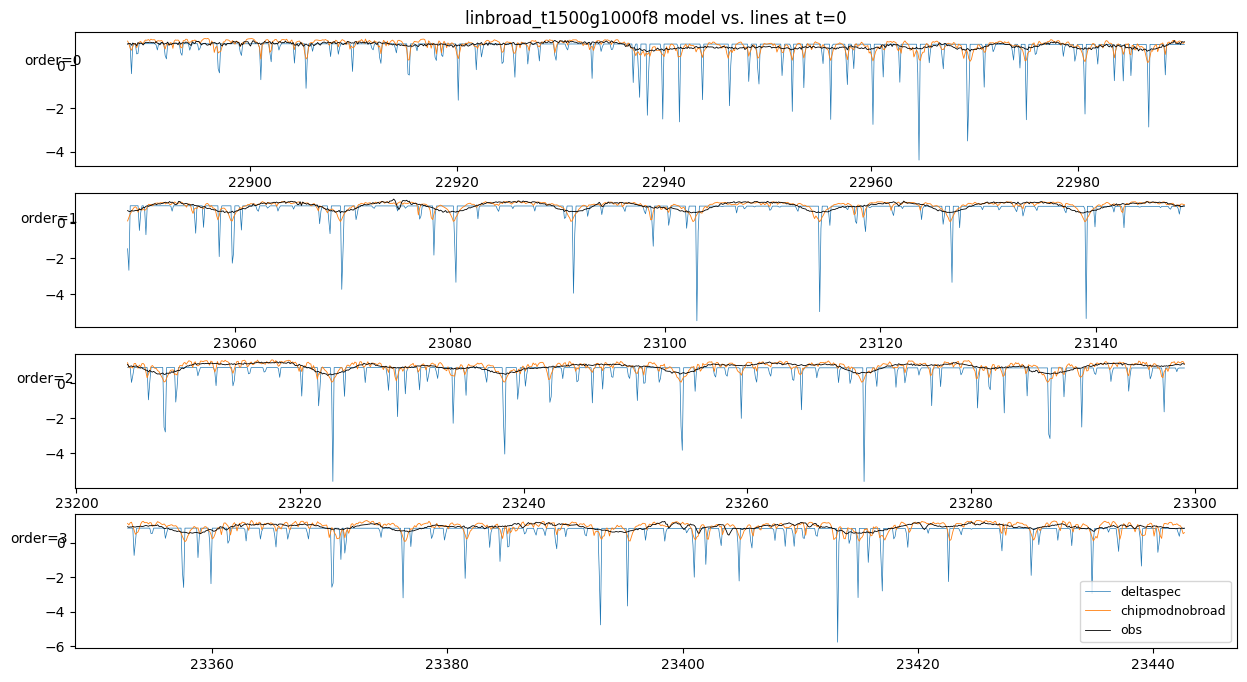

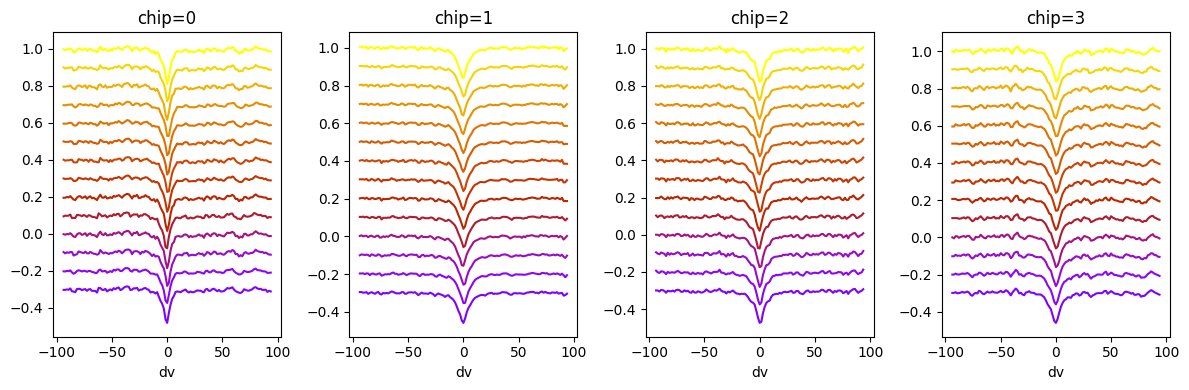

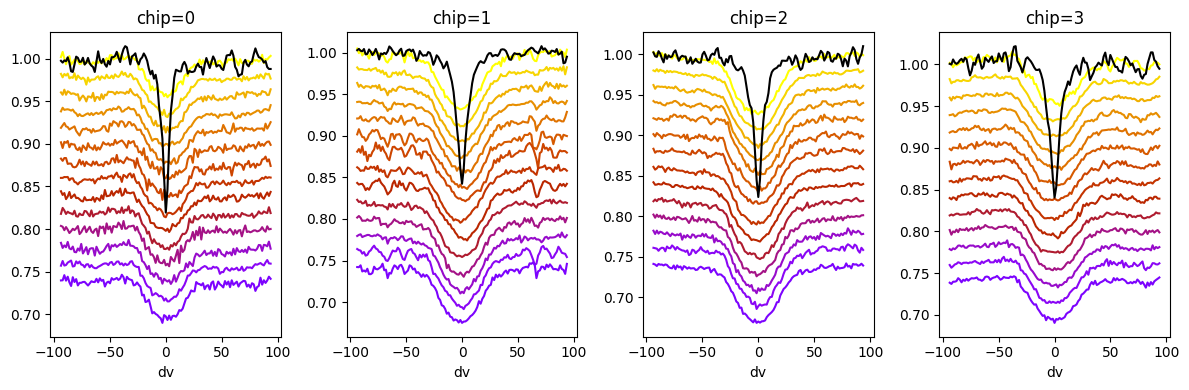

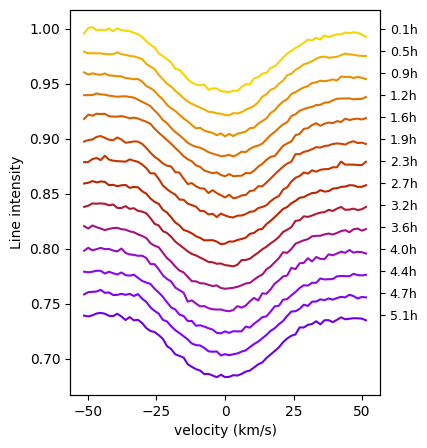

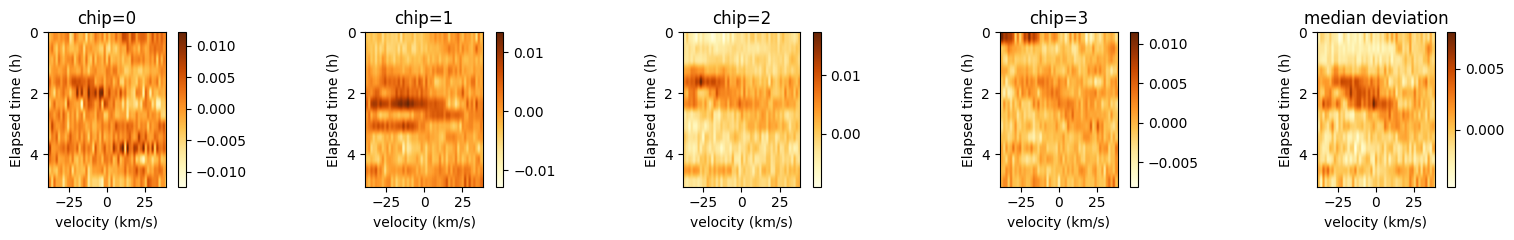

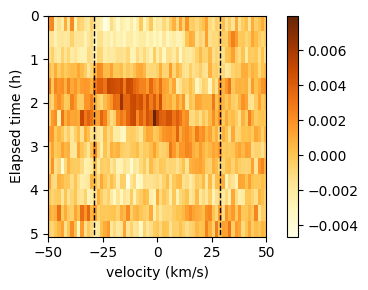

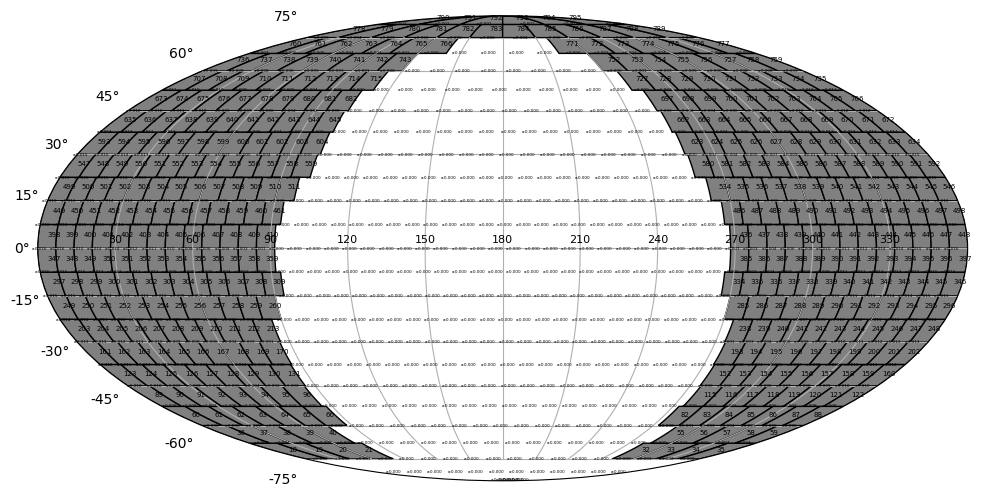

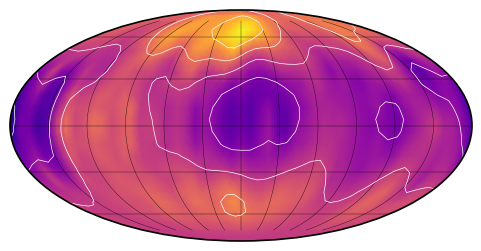

In [7]:
assert simulation_on == False
print(f"Using real observation {model_datafile}")

# Load data from pickle fit
mean_spectrum, template, observed, residual, error, wav_nm, wav0_nm = load_data(model_datafile, instru, nobs, goodchips)

# Compute LSD mean profile

intrinsic_profiles, obskerns_norm = make_LSD_profile(instru, template, observed, wav_nm, goodchips, pmod, line_file, cont_file, 
                                                     nk, vsini, rv, period, timestamps[target], savedir, cut=cut)


# Solve by 5 solvers
bestparamgrid_r, res = solve_IC14new(intrinsic_profiles, obskerns_norm, kwargs_IC14, kwargs_fig, 
    annotate=False, colorbar=False, spotfit=False, create_obs_from_diff=False)

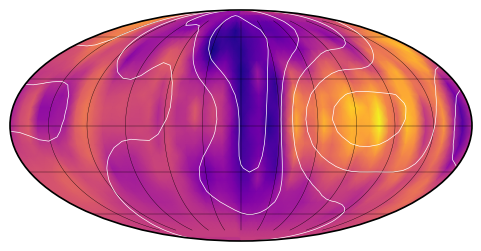

In [3]:
plot_IC14_map(np.roll(bestparamgrid_r, shift=int(bestparamgrid_r.shape[1]*0.5)), clevel=5, sigma=2)

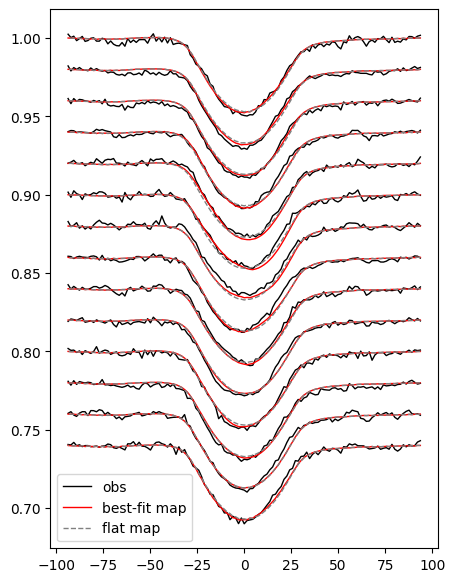

In [8]:
obs_2d = np.reshape(res['sc_observation_1d'], (nobs, nk))
bestmodel_2d = np.reshape(res['model_observation'], (nobs, nk))
flatmodel_2d = np.reshape(res['flatmodel'], (nobs, nk))

plt.figure(figsize=(5, 7))
for i in range(nobs):
    plt.plot(res['dv'], obs_2d[i] - 0.02*i, color='k', linewidth=1)
    #plt.plot(obs[i] - 0.02*i, '.', color='k', markersize=2)
    plt.plot(res['dv'], bestmodel_2d[i] - 0.02*i, color='r', linewidth=1)
    plt.plot(res['dv'], flatmodel_2d[i] - 0.02*i, '--', color='gray', linewidth=1)
plt.legend(labels=['obs', 'best-fit map', 'flat map'])
plt.show()

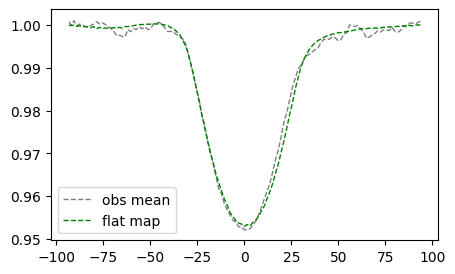

In [15]:
plt.figure(figsize=(5, 3))
plt.plot(res['dv'], obs_2d.mean(0), '--', color='gray', linewidth=1)
plt.plot(res['dv'], flatmodel_2d[0], '--', color='g', linewidth=1)
#plt.plot(res['dv'], bestmodel_2d[0], color='r', linewidth=1)

plt.legend(labels=['obs mean', 'flat map'])
plt.show()

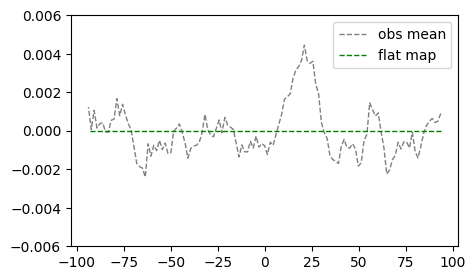

In [16]:
plt.figure(figsize=(5, 3))
plt.plot(res['dv'], obs_2d.mean(0) - flatmodel_2d[0], '--', color='gray', linewidth=1)
plt.plot(res['dv'], flatmodel_2d[0] - flatmodel_2d[0], '--', color='g', linewidth=1)
#plt.plot(res['dv'], bestmodel_2d[0], color='r', linewidth=1)
plt.ylim(-0.006, 0.006)
plt.legend(labels=['obs mean', 'flat map'])
plt.show()

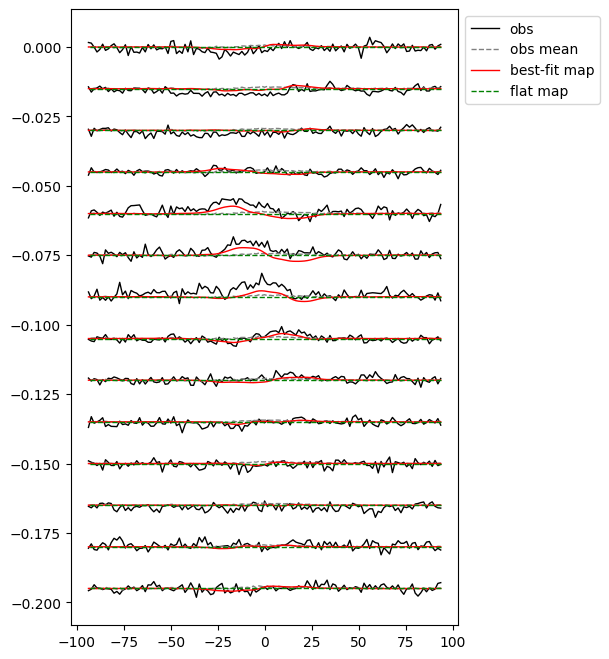

In [6]:
obs_2d = np.reshape(res['sc_observation_1d'], (nobs, nk))
bestmodel_2d = np.reshape(res['model_observation'], (nobs, nk))
flatmodel_2d = np.reshape(res['flatmodel'], (nobs, nk))

plt.figure(figsize=(5, 8))
gap=0.015
for i in range(nobs):
    plt.plot(res['dv'], obs_2d[i] - flatmodel_2d[i] - gap*i, color='k', linewidth=1)
    #plt.plot(obs[i] - 0.02*i, '.', color='k', markersize=2)
    plt.plot(res['dv'], obs_2d.mean(0) - flatmodel_2d[i] - gap*i, '--', color='gray', linewidth=1)
    plt.plot(res['dv'], bestmodel_2d[i] - flatmodel_2d[i] - gap*i, color='red', linewidth=1)
    plt.plot(res['dv'], flatmodel_2d[i] - flatmodel_2d[i] - gap*i, '--', color='g', linewidth=1)
plt.legend(labels=['obs', 'obs mean', 'best-fit map', 'flat map'], bbox_to_anchor=(1,1))
plt.show()

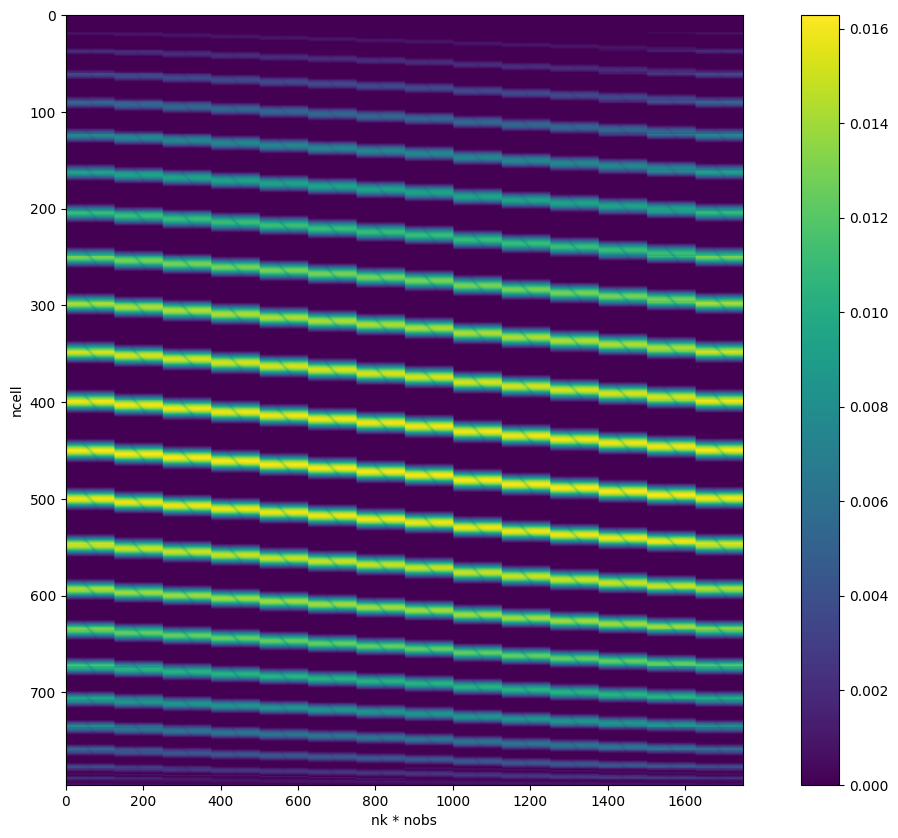

In [62]:
plt.figure(figsize=(15,10))
Rmatrix = res['Rmatrix']
plt.imshow(res['Rmatrix'], aspect=2.5)
plt.xlabel("nk * nobs")
plt.ylabel("ncell")
plt.colorbar()
plt.show()

In [14]:
flatguess = 100*np.ones(res['bestparams'].shape)

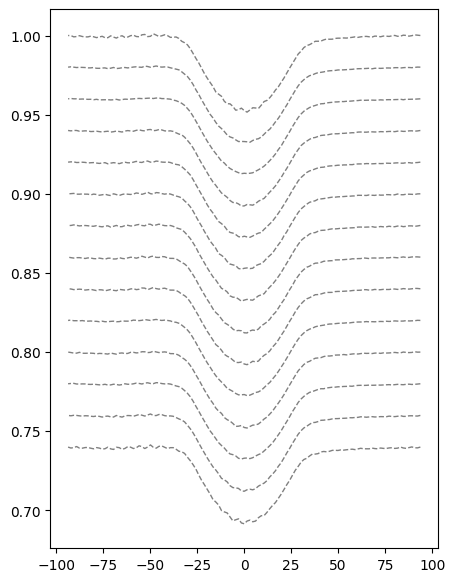

In [20]:
flatmodel = dime.normalize_model(np.dot(flatguess, Rmatrix), nk)
flatmodel_2d = np.reshape(flatmodel, (nobs, nk))
plt.figure(figsize=(5, 7))
for i in range(nobs):
    plt.plot(res['dv'], flatmodel_2d[i] - 0.02*i, '--', color='gray', linewidth=1)

*** Using solver IC14new ***
Created equa-area grid of 796 cells, in 24 latitude grids with [ 6 12 18 24 29 34 38 42 46 48 50 51 51 50 48 46 42 38 34 29 24 18 12  6] lontitude cells.


/Users/xqchen/workspace/igrins_doppler_imaging/src/scripts/ELL_map_class.py:442: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(1. - np.tan(inc)**2 / np.tan(self.corners_latlon[0,ii])**2)


  ITER       METRIC         FACTOR             DMETRIC
      1   357.972570   1.50000e+00   -6.518e-01
      2   357.010652   2.25000e+00   -9.619e-01
      3   355.602497   3.37500e+00   -1.408e+00
      4   353.565949   5.06250e+00   -2.037e+00
      5   350.673506   7.59375e+00   -2.892e+00
      6   346.675037   1.13906e+01   -3.998e+00
      7   341.365156   1.70859e+01   -5.310e+00
      8   334.718851   2.56289e+01   -6.646e+00
      9   327.083534   3.84434e+01   -7.635e+00
     10   319.301444   5.76650e+01   -7.782e+00
     11   312.482836   8.64976e+01   -6.819e+00
     12   307.296447   1.29746e+02   -5.186e+00
     13   303.450987   1.94620e+02   -3.845e+00
     14   300.208756   2.91929e+02   -3.242e+00
     15   296.940116   4.37894e+02   -3.269e+00
     16   293.061174   6.56841e+02   -3.879e+00
     17   288.555054   9.85261e+02   -4.506e+00
     18   288.555054   4.92631e+02   -4.506e+00
     19   288.086069   4.92631e+02   -4.690e-01
     20   288.086069   2.46315e+0

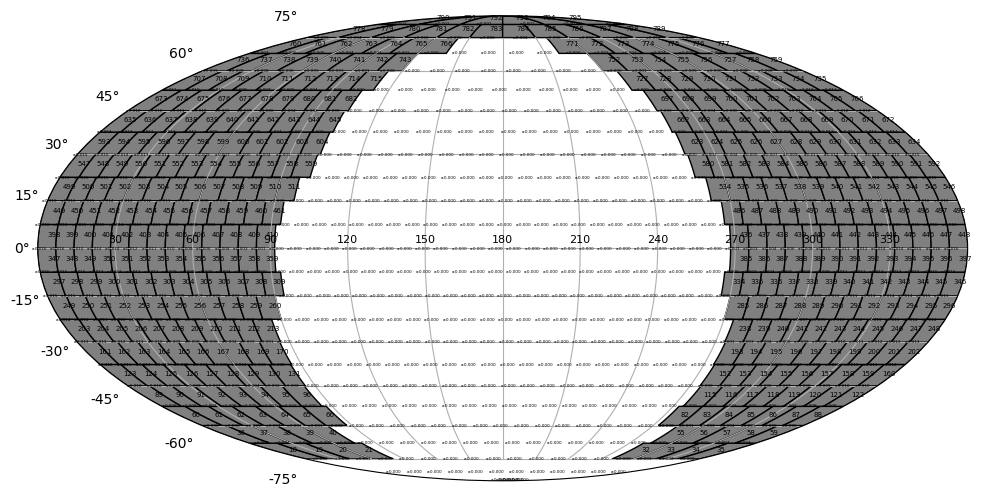

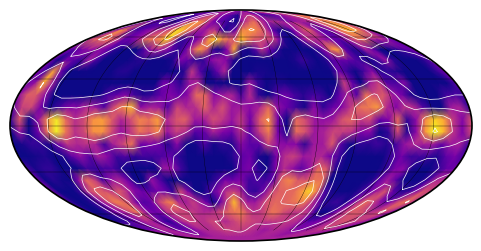

In [63]:
for alpha in [0]:
    kwargs_IC14 = dict(
        phases=phases, 
        inc=inc, 
        vsini=vsini, 
        LLD=LLD, 
        eqarea=use_eqarea, 
        nlat=nlat, 
        nlon=nlon,
        alpha=alpha,
        ftol=ftol
    )
    
    bestparamgrid_r, res = solve_IC14new(intrinsic_profiles, obskerns_norm, kwargs_IC14, kwargs_fig, annotate=False, colorbar=False, spotfit=False)

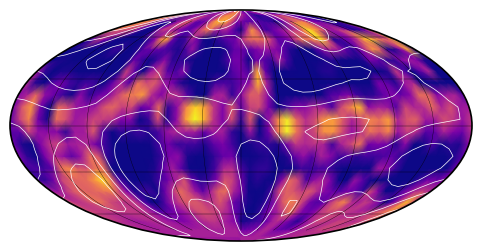

In [68]:
plot_IC14_map(np.roll(bestparamgrid_r, shift=int(bestparamgrid_r.shape[1]*0.5)), clevel=5, sigma=2)

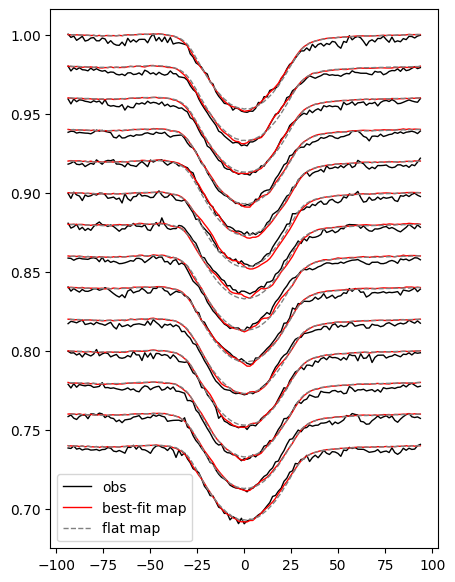

In [69]:
obs_2d = np.reshape(res['sc_observation_norm'], (nobs, nk))
bestmodel_2d = np.reshape(res['model_observation'], (nobs, nk))
flatmodel_2d = np.reshape(res['flatmodel'], (nobs, nk))

plt.figure(figsize=(5, 7))
for i in range(nobs):
    plt.plot(res['dv'], obs_2d[i] - 0.02*i, color='k', linewidth=1)
    #plt.plot(obs[i] - 0.02*i, '.', color='k', markersize=2)
    plt.plot(res['dv'], bestmodel_2d[i] - 0.02*i, color='r', linewidth=1)
    plt.plot(res['dv'], flatmodel_2d[i] - 0.02*i, '--', color='gray', linewidth=1)
plt.legend(labels=['obs', 'best-fit map', 'flat map'])
plt.show()

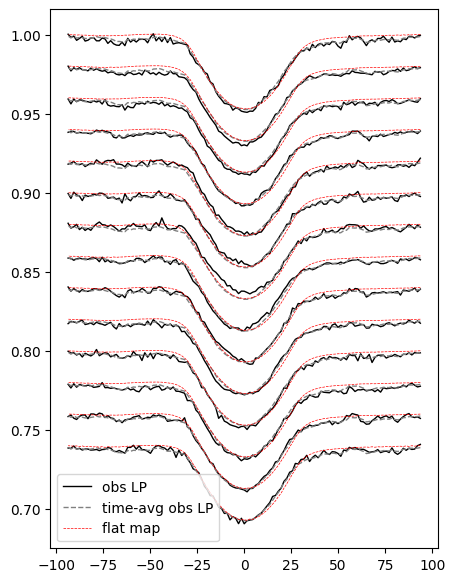

In [83]:
obs_mean = np.mean(obs_2d, axis=0)
plt.figure(figsize=(5,7))
for i in range(nobs):
    plt.plot(res['dv'], obs_2d[i] - 0.02*i, color='k', linewidth=1)
    #plt.plot(res['dv'], obs_2d[i] - 0.02*i, '.', color='k', markersize=2)
    plt.plot(res['dv'], obs_mean - 0.02*i, '--', color='gray', linewidth=1)
    plt.plot(res['dv'], flatmodel_2d[i] - 0.02*i, '--', color='red', linewidth=0.5)
plt.legend(labels=['obs LP', 'time-avg obs LP', 'flat map'])
plt.show()